In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
km3 = pd.read_csv("kmeans_dataset.csv")
km3.head()

,Hardwork,Skills,Label
0,1.483358,6.135020,C Tier
1,52.864104,48.897037,B Tier
2,67.556683,19.359183,D Tier
3,52.797684,43.650076,B Tier
4,45.060080,74.978268,B Tier


In [37]:
km3.drop('Label',axis=1,inplace=True)
km3

,Hardwork,Skills
0,1.483358,6.135020
1,52.864104,48.897037
2,67.556683,19.359183
3,52.797684,43.650076
4,45.060080,74.978268
...,...,...
455,48.414533,53.807818
456,49.534222,54.425778
457,30.457458,40.396009
458,2.277720,5.085407


In [38]:
X = np.array(km3)

In [39]:
import random
init_centroids = random.sample(range(0, len(km3)), 4)
init_centroids

[139, 49, 126, 95]

In [40]:
centroids = []
for i in init_centroids:
    centroids.append(km3.loc[i])
centroids

[Hardwork    63.760132
 Skills      12.141435
 Name: 139, dtype: float64,
 Hardwork    44.484413
 Skills      55.437602
 Name: 49, dtype: float64,
 Hardwork    16.822918
 Skills      18.969051
 Name: 126, dtype: float64,
 Hardwork    37.031608
 Skills      79.783855
 Name: 95, dtype: float64]

In [41]:
centroids = np.array(centroids)
centroids

array([[63.76013244, 12.14143508],
       [44.48441317, 55.43760182],
       [16.82291819, 18.96905075],
       [37.03160802, 79.78385498]])

In [42]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [43]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [44]:
get_centroids = findClosestCentroids(centroids, X)
get_centroids

[2,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 3,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 3,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 3,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 2,
 1,
 2,
 3,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 1,
 1,
 0,
 0,
 3,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 0,
 2,
 3,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 3,
 2,
 0,
 2,
 3,
 1,
 2,
 3,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 3,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 0,
 1,
 0,
 3,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 3,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 3,
 1,


In [45]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

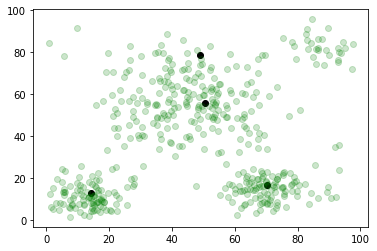

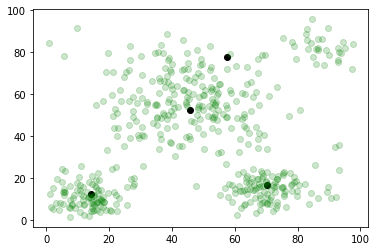

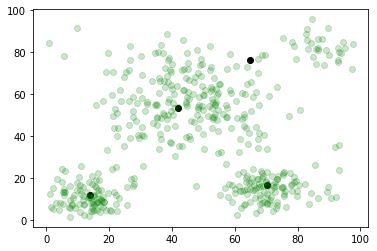

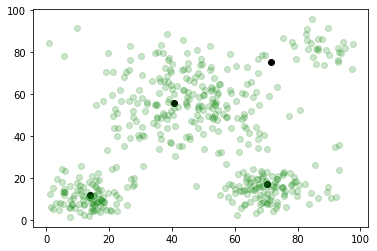

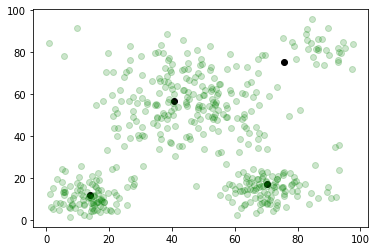

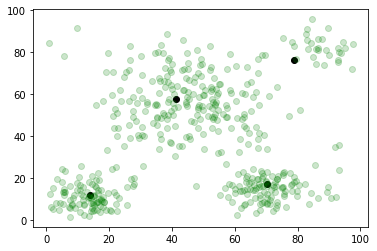

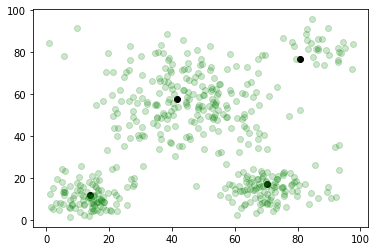

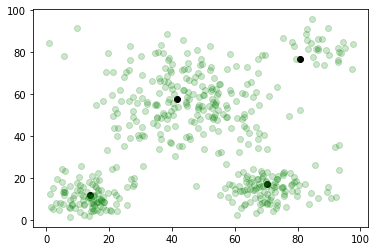

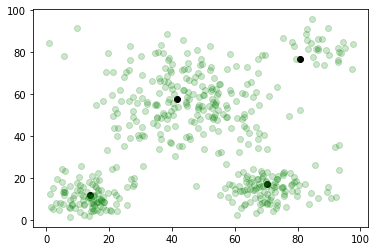

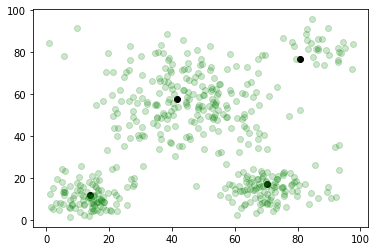

In [46]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black',)
    plt.scatter(X[:, 0], X[:, 1],c='green', alpha=0.2)
    plt.show()